In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
dataset = pd.read_csv('car data.csv')

In [3]:
#Our dataset
dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
#First five rows of dataset
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
dataset.shape

(301, 9)

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Seller_Type    301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


In [6]:
#Number of missing values
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
dataset.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':0}}, inplace=True)
dataset.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace=True)
dataset.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace=True)

In [8]:
dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [9]:
# Assuming dataset is your pandas DataFrame
columns_to_select = ['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']
x = dataset[columns_to_select]
y = dataset['Selling_Price']


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=2)

In [11]:
# Linear Regression model 
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [12]:
predict = reg.predict(x_train)

In [13]:
score = reg.score(x_train,y_train)
print('Score', score )

Score 0.8904440618422426


In [14]:
error = metrics.r2_score(y_train,predict)
print('Error: ', error)

Error:  0.8904440618422426


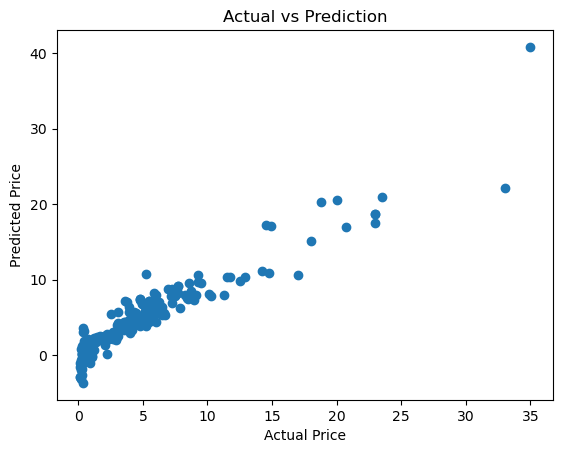

In [15]:
plt.scatter(y_train,predict)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Prediction')
plt.show()

In [16]:
test_predict = reg.predict(x_test)

In [17]:
test_predict

array([10.71947528,  0.76098489,  4.23492199,  5.44392515,  9.8407211 ,
        4.20621885,  3.38288251,  7.8571392 ,  0.22163598,  5.11667382,
        6.11917556,  6.69167024,  2.33337423,  7.5935312 ,  1.95345035,
        1.7473649 ,  2.05428509,  1.88414905,  9.74921386,  4.23368557,
        1.51452731,  9.54450509,  1.49671833,  9.63913072,  0.87101644,
        8.53230491,  1.57084539, -3.13921949,  4.22090079,  2.13772356,
        3.62149519,  3.72732217,  5.52459811,  7.61228812, -1.82253393,
        7.29457201,  8.67173709,  5.75540082,  6.06807753,  6.76477274,
       16.28583661,  2.10088612,  1.09507188, -0.39075561,  7.30098495,
        6.69304316,  1.02728914,  7.31787252, 14.16235333,  3.02956502,
        8.49735414, -0.81687968,  8.77558152,  1.1892398 ,  2.14435125,
       -0.7632228 ,  0.73712598,  9.93794916, -0.39775785, -2.3284985 ,
       10.44903895,  6.69222764,  0.99435356,  4.33471472,  0.08474621,
        3.68681152,  2.819716  ,  1.46775949,  0.46381654,  1.64

In [18]:
reg.score(x_test,y_test)

0.8241921584183329

In [19]:
error = metrics.r2_score(y_test,test_predict)
print('Error: ', error)

Error:  0.8241921584183329


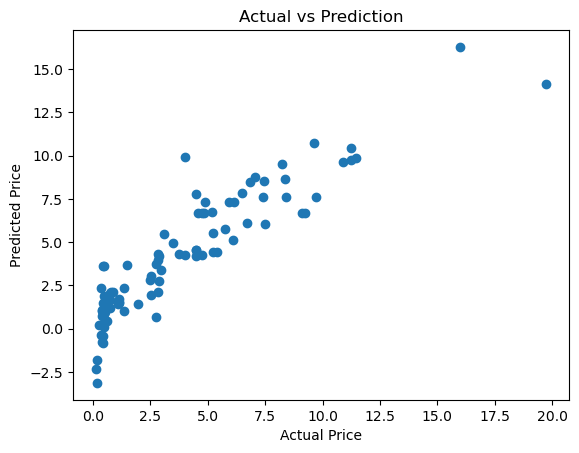

In [20]:
plt.scatter(y_test,test_predict)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Prediction')
plt.show()

In [24]:

numeric_dataset = dataset.select_dtypes(include=['float64', 'int64'])



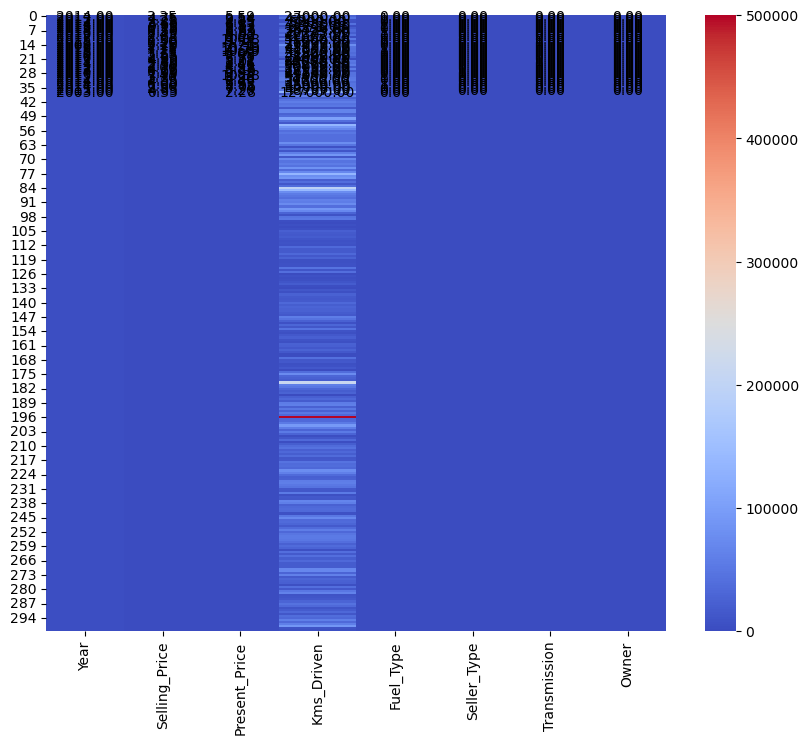

In [23]:
plt.figure(figsize=(10, 8))  # Adjust figure size if needed
sns.heatmap(numeric_dataset, cmap='coolwarm', annot=True, fmt='.2f', annot_kws={"size": 10, "color": 'black'}) # Set font size and color for annotations
plt.show()